<a href="https://colab.research.google.com/github/Dracomp89/Eduardo-Phillips---202115611-Juan-Esteban-Sanchez---202213476/blob/main/Parcial_2/Parcial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gravitational field (Gaussian quadrature) at (0, 0, 0.2): -152.595252 m/s^2
Gravitational field (dblquad) at (0, 0, 0.2): -152.595252 m/s^2
Expected gravitational field: -9.813646 m/s^2
Error in Gaussian quadrature: 142.781606
Error in dblquad integration: 142.781606


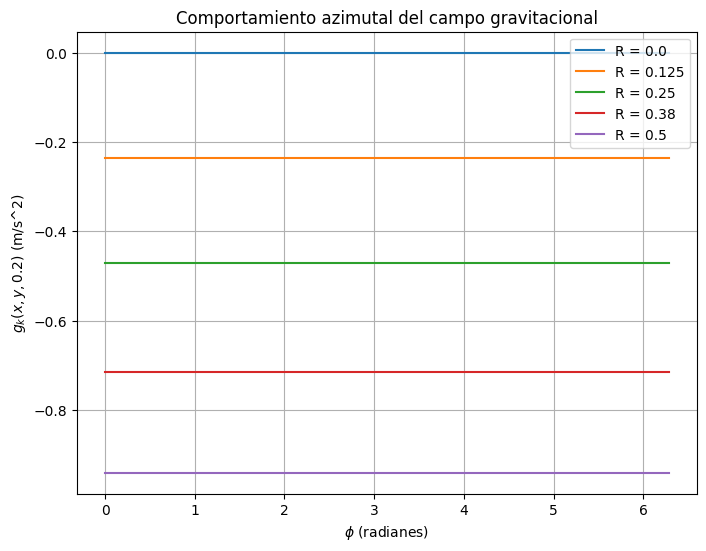

In [16]:
import numpy as np
from scipy.integrate import dblquad
from scipy.special import roots_legendre

# Constants
R = 1.0  # Radius of the disk
k = 1.9429030960  # Gravitational constant scaling factor
g_expected = -9.813646  # Expected gravitational field at (0, 0, 0.2)

# Define the gravitational field function based on equation 4.208
def gravitational_field_integrand(r, phi, x, y, z):
    x2 = x**2 + y**2 + z**2 - 2 * r * x * np.cos(phi) - 2 * r * y * np.sin(phi)
    return r * z / (x2**(3/2))

# Function to calculate gravitational field using Gaussian quadrature
def compute_gravitational_field_gauss(x, y, z, N=50):
    # Get Gaussian quadrature points and weights
    r_points, r_weights = roots_legendre(N)
    phi_points, phi_weights = roots_legendre(N)

    # Scale quadrature points for the range 0 to R and 0 to 2*pi
    r_points = 0.5 * (r_points + 1) * R
    r_weights = 0.5 * R * r_weights
    phi_points = 0.5 * (phi_points + 1) * 2 * np.pi
    phi_weights = 0.5 * 2 * np.pi * phi_weights

    # Compute the gravitational field using double quadrature
    g = 0.0
    for i in range(N):
        for j in range(N):
            g += r_weights[i] * phi_weights[j] * gravitational_field_integrand(r_points[i], phi_points[j], x, y, z)

    return -k * g

# Function to calculate gravitational field using double integration (dblquad)
def compute_gravitational_field_dblquad(x, y, z):
    result, error = dblquad(
        lambda r, phi: gravitational_field_integrand(r, phi, x, y, z),
        0, 2 * np.pi,
        lambda r: 0, lambda r: R
    )
    return -k * result

# Verify the gravitational field at the point (0, 0, 0.2)
x, y, z = 0.0, 0.0, 0.2
g_gauss = compute_gravitational_field_gauss(x, y, z)
g_dblquad = compute_gravitational_field_dblquad(x, y, z)

print(f"Gravitational field (Gaussian quadrature) at (0, 0, 0.2): {g_gauss:.6f} m/s^2")
print(f"Gravitational field (dblquad) at (0, 0, 0.2): {g_dblquad:.6f} m/s^2")
print(f"Expected gravitational field: {g_expected} m/s^2")

# Compare the results to the expected value
gauss_error = abs(g_gauss - g_expected)
dblquad_error = abs(g_dblquad - g_expected)

print(f"Error in Gaussian quadrature: {gauss_error:.6f}")
print(f"Error in dblquad integration: {dblquad_error:.6f}")





# Constantes
k = 1.9429033960  # Constante ajustada para que g(0, 0, 0.2) sea -9.813646 m/s^2
z = 0.2  # Altura en z donde se evalúa el campo
R_values = [0.0, 0.125, 0.25, 0.38, 0.5]  # Valores de radio a estudiar
phi_values = np.linspace(0, 2 * np.pi, 100)  # Valores de phi (ángulo azimutal)

# Función integrando para la ecuación 4.208
def integrand(r, theta, z):
    """Función que define el integrando del campo gravitacional."""
    # Convertir coordenadas polares a cartesianas
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    # Calcular el denominador que incluye la distancia
    denominator = (x**2 + y**2 + z**2)**(3/2)

    # Retornar el integrando que incluye la parte z
    return r * z / denominator

# Función para calcular el campo gravitacional usando integración numérica
def compute_gravitational_field(R, z):
    """Calcula el campo gravitacional para un valor de R."""
    g_values = []
    for theta in phi_values:  # Recorrer los valores de phi (ángulo azimutal)
        g, _ = dblquad(integrand, 0, R, lambda r: 0, lambda r: 2*np.pi, args=(z,))
        g_values.append(-k * g)  # Multiplicar por la constante k
    return g_values

# Inicializar la gráfica
plt.figure(figsize=(8, 6))

# Calcular y graficar el campo gravitacional para cada valor de R
for R in R_values:
    g_values = compute_gravitational_field(R, z)

    # Graficar el comportamiento azimutal del campo para este valor de R
    plt.plot(phi_values, g_values, label=f'R = {R}')

# Personalización de la gráfica
plt.xlabel(r'$\phi$ (radianes)')
plt.ylabel(r'$g_k(x, y, 0.2)$ (m/s^2)')
plt.title('Comportamiento azimutal del campo gravitacional')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()




Punto 26 literales e y f

Valor aproximado de la integral utilizando suma de Riemann: 3.7377777777777776


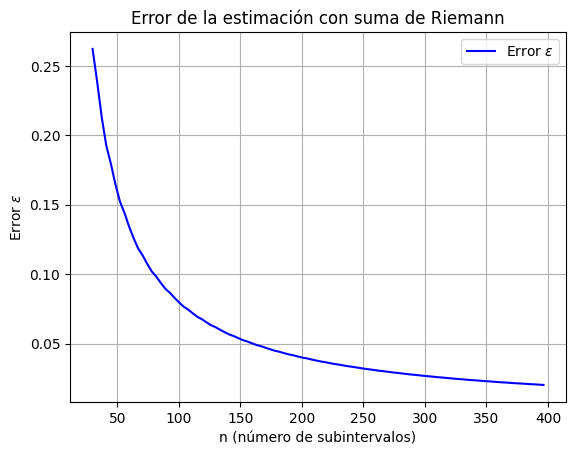

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función f(x) = x^3
def f(x):
    return x**3

# Parámetros
a = 0  # Límite inferior
b = 2  # Límite superior
n = 30  # Número de subintervalos

# Ancho de cada subintervalo (Δx)
dx = (b - a) / n

# Puntos nodales x_i
x_i = np.linspace(a, b, n+1)

# Evaluar f(x_i) en los puntos nodales
f_x_i = f(x_i)

# Calcular la suma de Riemann (Rectángulos a la derecha)
suma_riemann = np.sum(f_x_i[:-1]) * dx

# Imprimir el resultado
print(f"Valor aproximado de la integral utilizando suma de Riemann: {suma_riemann}")



# Definir la función f(x) = x^3
def f(x):
    return x**3

# Integral exacta
I_exacta = 4

# Rango de valores de n
n_values = np.linspace(30, 400, 100, endpoint=False)

# Inicializar lista para almacenar los errores
errors = []

# Calcular la suma de Riemann para cada n y el error asociado
for n in n_values:
    n = int(n)
    dx = 2 / n  # Ancho del subintervalo
    x_i = np.linspace(0, 2, n, endpoint=False)  # Puntos nodales
    f_x_i = f(x_i)
    I_estimada = np.sum(f_x_i) * dx  # Suma de Riemann
    error = np.abs(I_exacta - I_estimada)  # Error absoluto
    errors.append(error)

# Graficar el error como función de n
plt.plot(n_values, errors, label='Error $\\epsilon$', color='blue')
plt.xlabel('n (número de subintervalos)')
plt.ylabel('Error $\\epsilon$')
plt.title('Error de la estimación con suma de Riemann')
plt.grid(True)
plt.legend()
plt.show()

